##Assignment 1, Task 4 :7 segment LED display a deep convolutional autoencoder with MNIST dataset 

#ADL Group 45 

##Contribution Member
    
    Hemant Kumar Parakh (2023AA05741)
    Sushil Kumar (2023aa05849)
    Jitendra Kumar (2023aa05198)
    Parth Vashihtha (2023ab05104)

Dataset Used : Minst.

In [4]:
#Import statement

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [5]:
# Load MNIST dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [6]:
# Normalize the data in the form of 0 and 1

x_train, x_test = x_train / 255.0, x_test / 255.0  

In [7]:
#  Reshapes the training and testing data for compatibility with convolutional layers in a neural network:

x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [8]:
# Define the 7-segment representation

# 1: for the segment is ON.
# 0: for the segment is OFF.

digit_to_segments = {
    0: [1, 1, 1, 1, 1, 1, 0],
    1: [0, 1, 1, 0, 0, 0, 0],
    2: [1, 1, 0, 1, 1, 0, 1],
    3: [1, 1, 1, 1, 0, 0, 1],
    4: [0, 1, 1, 0, 0, 1, 1],
    5: [1, 0, 1, 1, 0, 1, 1],
    6: [1, 0, 1, 1, 1, 1, 1],
    7: [1, 1, 1, 0, 0, 0, 0],
    8: [1, 1, 1, 1, 1, 1, 1],
    9: [1, 1, 1, 1, 0, 1, 1],
}

In [9]:
# converting Y values into their corresponding 7-segment LED display representations.

y_train_segments = np.array([digit_to_segments[d] for d in y_train])
print("y_train_segments :")
print(y_train_segments)
y_test_segments = np.array([digit_to_segments[d] for d in y_test])
print()
print("y_test_segments :")
print(y_train_segments)

y_train_segments :
[[1 0 1 ... 0 1 1]
 [1 1 1 ... 1 1 0]
 [0 1 1 ... 0 1 1]
 ...
 [1 0 1 ... 0 1 1]
 [1 0 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]

y_test_segments :
[[1 0 1 ... 0 1 1]
 [1 1 1 ... 1 1 0]
 [0 1 1 ... 0 1 1]
 ...
 [1 0 1 ... 0 1 1]
 [1 0 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [17]:
# Defining the input image shape
input_img = layers.Input(shape=(28, 28, 1))

In [18]:
# Defining the encoder

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.Flatten()(x)
latent_space = layers.Dense(64, activation='relu')(x)  # Latent space


In [19]:
# Defining the Decoder

x = layers.Dense(7 * 7 * 128, activation='relu')(latent_space)
x = layers.Reshape((7, 7, 128))(x)
x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
output_img = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [20]:
# Define Decoder input/ output
decoder_input = layers.Input(shape=(64,))
decoder_output = output_img


In [23]:
# Defining models

#The encoder model captures the process of compressing input images into a latent space.
encoder = models.Model(inputs=input_img, outputs=latent_space, name="Encoder")


#The decoder model handles the reconstruction process,taking the latent space representation and 
#reconstructing the original input image
decoder = models.Model(inputs=decoder_input, outputs=decoder_output, name="Decoder")


#Autoencoder model
autoencoder = models.Model(inputs=input_img, outputs=output_img, name="Autoencoder")

In [22]:
#compile and trained

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 54s 125ms/step - loss: 0.1179 - val_loss: 0.1114
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 59s 139ms/step - loss: 0.1121 - val_loss: 0.1114
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 58s 138ms/step - loss: 0.1123 - val_loss: 0.1114
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 58s 138ms/step - loss: 0.1121 - val_loss: 0.1114
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 58s 137ms/step - loss: 0.1120 - val_loss: 0.1114
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 61s 144ms/step - loss: 0.1119 - val_loss: 0.1114
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 60s 142ms/step - loss: 0.1121 - val_loss: 0.1114
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 59s 139ms/step - loss: 0.1124 - val_loss: 0.1114
Epoch 9/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 64s 151ms/step - loss: 0.1121 - val_loss: 0.1114
Epoch 10/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 64s 151ms/step - loss: 0.1119 - val_loss: 0.1114


In [25]:
# Extract features from the encoder
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

#reconstructed_images = decoder.predict(x_train_features[:10])

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [26]:
# Build MLP model for training
mlp = models.Sequential([
    layers.Input(shape=(64,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(7, activation='sigmoid')
])


In [27]:
#Training the mlp models

mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp.fit(x_train_encoded, y_train_segments, epochs=10, batch_size=128, validation_split=0.1)



Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2064 - loss: 0.9540 - val_accuracy: 0.0000e+00 - val_loss: 0.5491
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.0976 - loss: 0.5489 - val_accuracy: 0.7462 - val_loss: 0.5536
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.1598 - loss: 0.5382 - val_accuracy: 0.1082 - val_loss: 0.5264
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.1364 - loss: 0.5211 - val_accuracy: 0.1797 - val_loss: 0.4986
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.2391 - loss: 0.5040 - val_accuracy: 0.1325 - val_loss: 0.4855
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.2729 - loss: 0.4872 - val_accuracy: 0.2332 - val_loss: 0.4735
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.2782 - loss: 0.4810 - val_accuracy: 0.2535 - val_loss: 0.4694
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.2719 - loss: 0.4745 

In [46]:
"""Find the closest segment representation based on Hamming distance."""
def find_closest_segment(pred_segment, digit_to_segments):
    min_distance = float('inf')
    closest_digit = None
    for digit, segment in digit_to_segments.items():
        distance = np.sum(np.array(segment) != np.array(pred_segment))
        if distance < min_distance:
            min_distance = distance
            closest_digit = digit
    return closest_digit

In [49]:
# Evaluate and Generate Confusion Matrix
y_pred_segments = (mlp.predict(x_test_encoded) > 0.5).astype(int)

y_pred_digits = y_pred_digits = [find_closest_segment(p, digit_to_segments) for p in y_pred_segments]
conf_matrix = confusion_matrix(y_test, y_pred_digits)
print(conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
[[  2   0 131   8   0   0   0   0 829  10]
 [  0 338  16 590  55   0   0   6  49  81]
 [  0   0 651  17   8   0   0   0 326  30]
 [  0   1 501 150   2   0   0   0 334  22]
 [  0   4   0   9 172   0   0   0 376 421]
 [  0  10 126  60  47   0   0   3 537 109]
 [  0   2  71  31   4   0   0   0 782  68]
 [  1  24  26 325 118   0   0  13 130 391]
 [  0   0 117  57   1   0   0   0 738  61]
 [  0   6   6  38 113   0   0   0 250 596]]


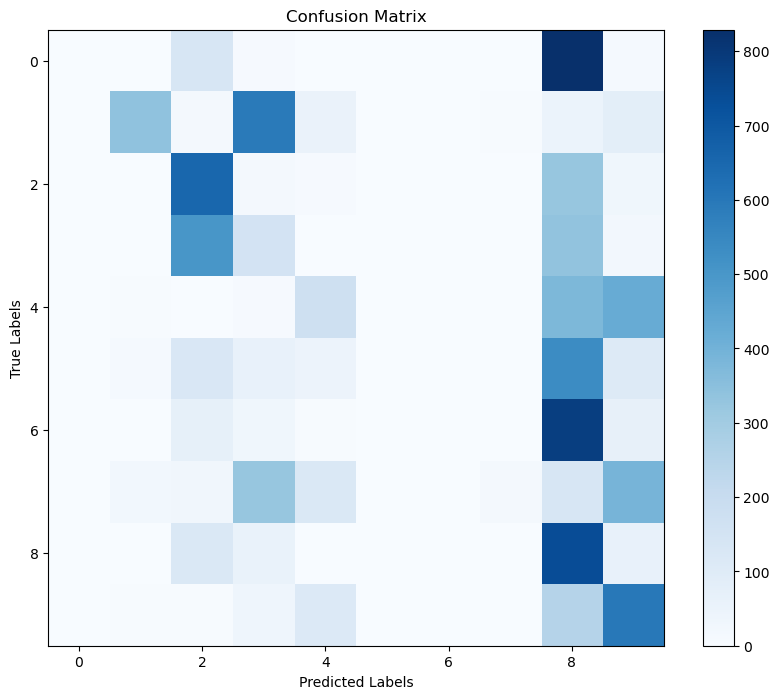

In [51]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues')
plt.colorbar()
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()